In [137]:
!pip install nibabel

In [138]:
import os
import shutil

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull
from skimage import measure

import glob
import csv


In [139]:
basepath = "/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/*"
mapping = {}
paths = sorted(glob.glob(basepath))
for path in paths:
    patientName = path.split("/")[-1]
    patientImages = sorted(glob.glob(path + "/*"))
    patientImages = [image for image in patientImages if image.endswith("T2W.nii") or image.endswith("PM.nii")]
    mapping[patientName] = patientImages

for item in mapping.items():
    print(item)

('ProstateX-0000', ['/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0000/PM.nii', '/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0000/T2W.nii'])
('ProstateX-0001', ['/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0001/PM.nii', '/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0001/T2W.nii'])
('ProstateX-0002', ['/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0002/PM.nii', '/Users/tonytu/Desktop/GT/Medical_CV_Research/task1/drive-download-20230104T222733Z-001/ProstateX-0002/T2W.nii'])


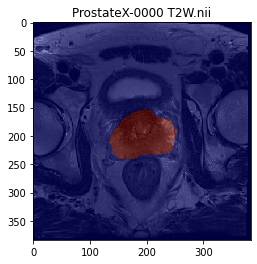

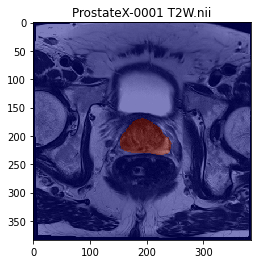

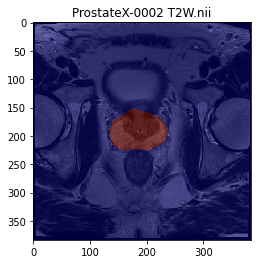

In [140]:
for patientName, patientImages in mapping.items():
    maskPath = patientImages[0]
    mriImagePath = patientImages[1]

    # Prostate mask for this patient
    mask = nib.load(maskPath)
    mask = mask.get_fdata()
    mask = mask.T

    # MRI Sequence for this patient
    im = nib.load(mriImagePath)
    im = im.get_fdata()
    im = im.T

    # Find image index with the largest prostate area in view
    areas = [np.sum(mask[i,:,:]) for i in range(mask.shape[0])]
    max_index = np.argmax(areas)

    # Overlay the mask on the image with the largest prostate area
    plt.figure()
    plt.title(patientName + " " + mriImagePath.split("/")[-1])
    plt.imshow(im[max_index,:,:], 'gray', interpolation='none')
    plt.imshow(mask[max_index,:,:], 'jet', interpolation='none', alpha=0.5)